Recreate the circuit from the lecture in the simulator. Note that you must convert the qubits |a⟩ and |b⟩ to the Bell state |β00⟩ beforehand. Enter the source code of your solution.

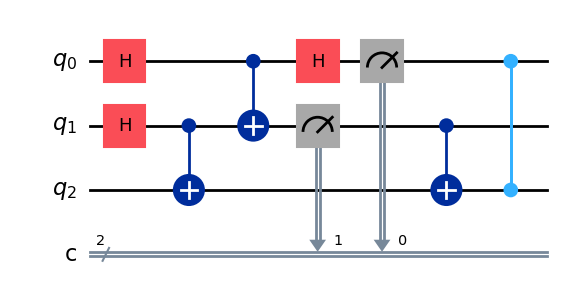

In [6]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3, 2)

circuit.h(1)
circuit.cx(1, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.h(0)

circuit.measure(0, 0)
circuit.measure(1, 1)

circuit.cx(1, 2)
circuit.cz(0, 2)

circuit.draw('mpl')

Rotate the qubit |χ⟩ around the x-axis by π/3 before teleportation and check the successful teleportation in the simulator.

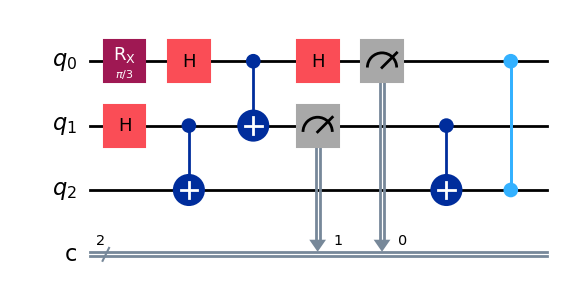

In [15]:
from qiskit import QuantumCircuit
import numpy as np

circuit = QuantumCircuit(3, 2)

circuit.h(1)
circuit.cx(1, 2)

circuit.rx(np.pi / 3, 0)

circuit.h(0)
circuit.cx(0, 1)
circuit.h(0)

circuit.measure(0, 0)
circuit.measure(1, 1)

circuit.cx(1, 2)
circuit.cz(0, 2)

circuit.draw('mpl')


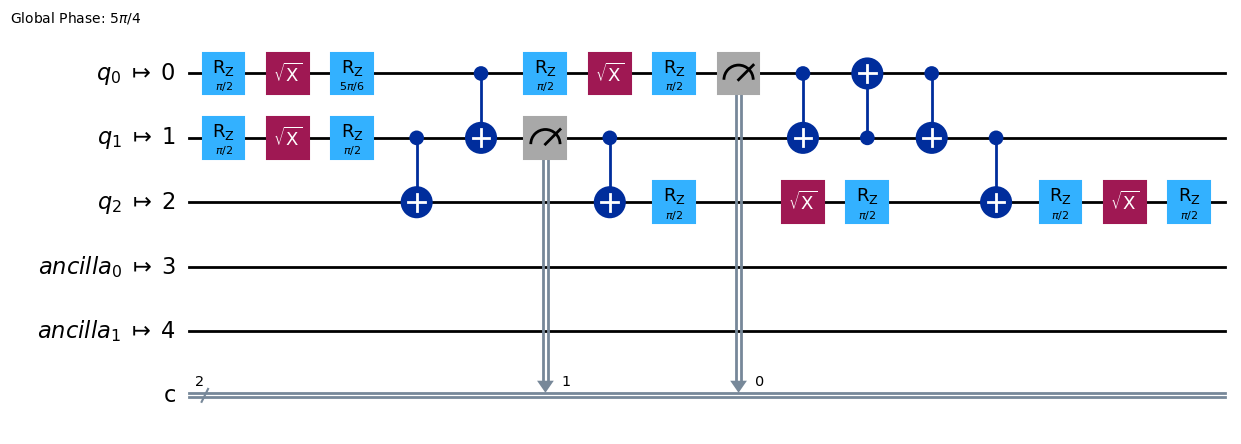

In [16]:
from qiskit.visualization import plot_coupling_map
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2
from qiskit import transpile

backend = FakeQuitoV2()

plot_coupling_map(backend.num_qubits, qubit_coordinates=None, coupling_map=backend.coupling_map.get_edges())

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl", style="iqp")

In [18]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
statevector = job.result().get_statevector()
statevector_drawer = plot_bloch_multivector(statevector)
statevector_drawer.show()

c:\Users\noel_\anaconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


QiskitError: 'No statevector for experiment "None"'

Recreate the circuit for the superdense coding in the simulator and submit the source file of your solution. To do this,
you must be able to measure the Bell base using the tools available in the simulator.
Assistance: The measurement to the base {|+⟩ , |−⟩}, can also be seen as a transformation to the base {|0⟩ , |1⟩}
and subsequent measurement relative to it. Reproduce this behavior in the simulator: First bring a qubit into a
superposition with the help of a Hadamard transformation and then try to obtain the input state before the Hadamard
transformation with the help of a second Hadamard transformation and subsequent classical measurement.
Think about how you can use this knowledge to measure the Bell base {|β00⟩ , |β01⟩ , |β10⟩ , |β11⟩} can be used

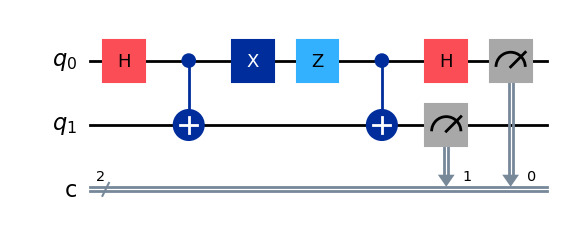

In [19]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.x(0)
qc.z(0)

qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])

qc.draw('mpl')

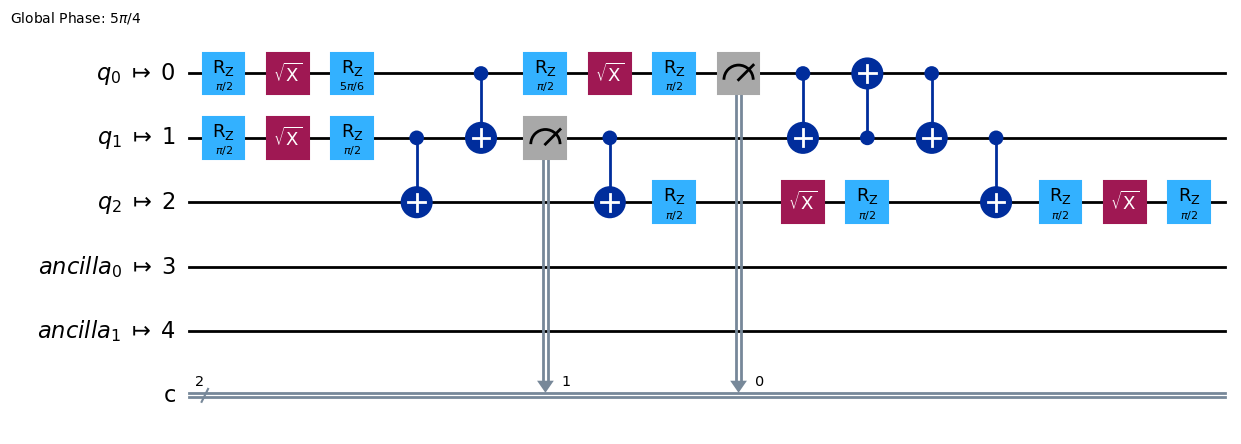

In [20]:
from qiskit.visualization import plot_coupling_map
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2
from qiskit import transpile

backend = FakeQuitoV2()

plot_coupling_map(backend.num_qubits, qubit_coordinates=None, coupling_map=backend.coupling_map.get_edges())

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl", style="iqp")

c:\Users\noel_\anaconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


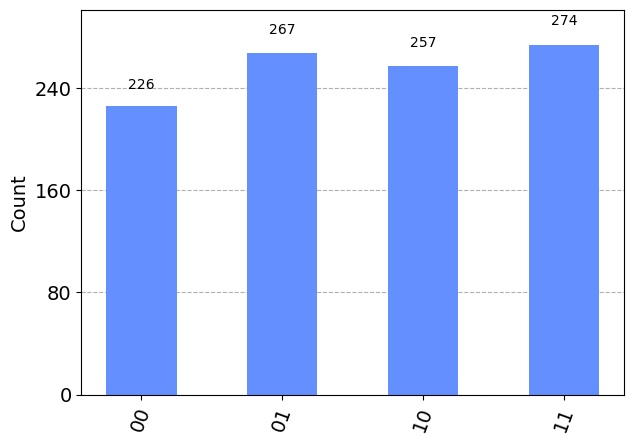

In [22]:
from qiskit.visualization import plot_histogram
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)